# Projekt Week 03 - Bike Share Demand

## Buisness Goal

#### Predict the total count of bikes rented during each hour 

## Import

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)

## Read Data

In [4]:
data_train = pd.read_csv('data/bike-share-demand/train.csv', parse_dates=True, index_col=0)

In [8]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
data_train.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


* *datetime* - hourly date + timestamp  
* *season* -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* *holiday* - whether the day is considered a holiday
* *workingday* - whether the day is neither a weekend nor holiday
* *weather* 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* *temp* - temperature in Celsius
* *atemp* - "feels like" temperature in Celsius
* *humidity* - relative humidity
* *windspeed* - wind speed
* *casual* - number of non-registered user rentals initiated
* *registered* - number of registered user rentals initiated
* *count* - number of total rentals **(y value)**

In [ ]:
### y-value = 'count' column

## Train-Test-Split

#### Test data is in seperate file test.csv 

In [12]:
X_train = data_train.drop(['count'], axis=1)
y_train = data_train['count']

## EDA

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.3 MB


In [19]:
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


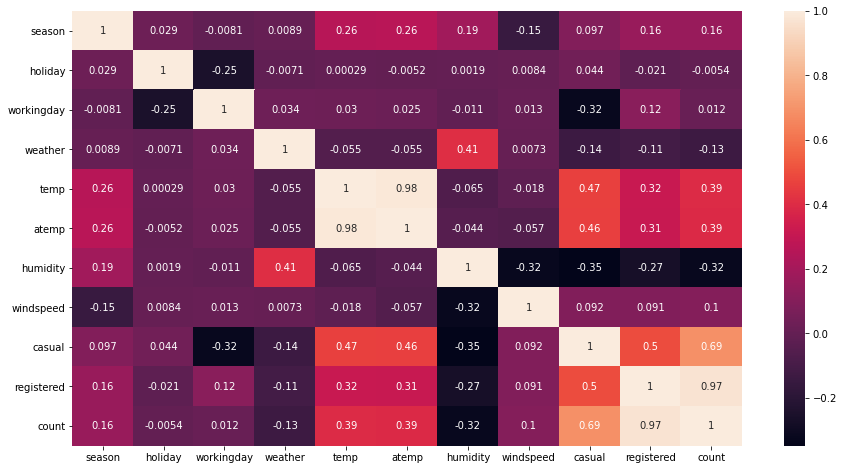

In [26]:
sns.heatmap(data_train.corr(), annot=True)

In [29]:
X_train['month'] = X_train.index.month
X_train['day'] = X_train.index.day
X_train['weekday'] = X_train.index.day_name()
X_train['hour'] = X_train.index.hour

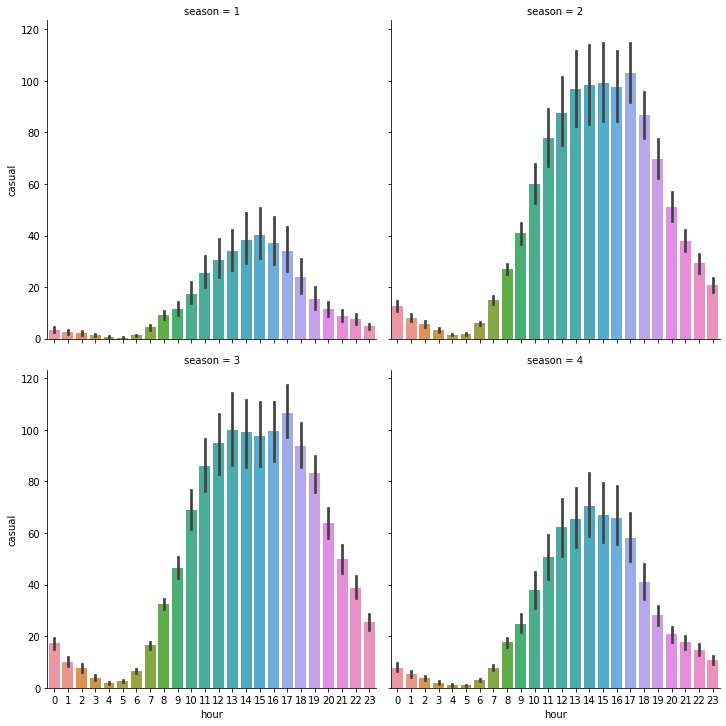

In [35]:
sns.catplot(x='hour', y='casual', data=X_train, col='season', col_wrap=2, kind='bar')
#sns.relplot(x='hour', y='registered', data=X_train, row='season')

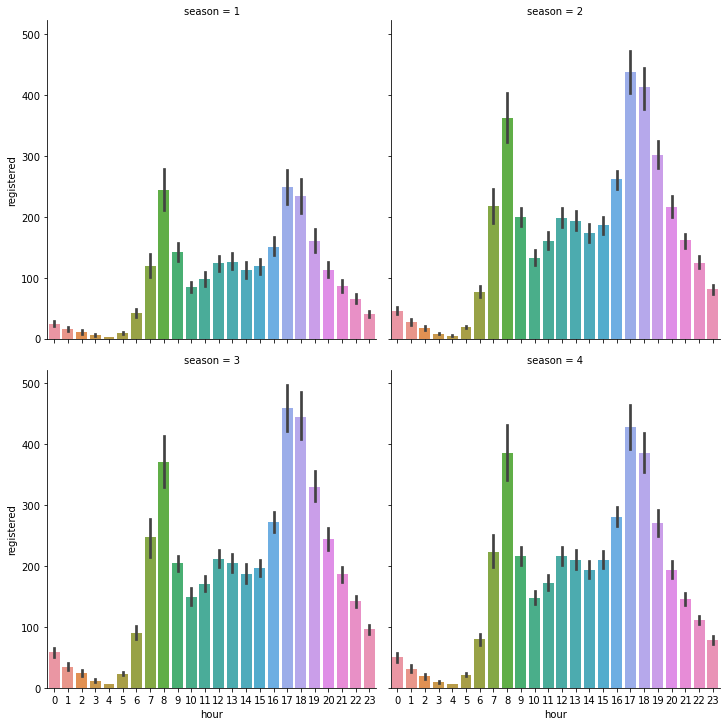

In [36]:
sns.catplot(x='hour', y='registered', data=X_train, col='season', col_wrap=2, kind='bar')

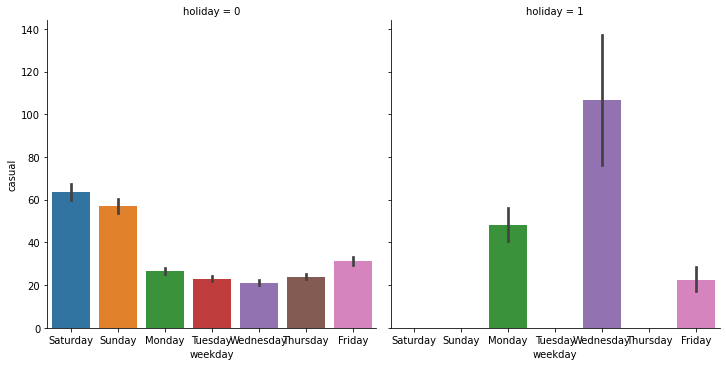

In [37]:
sns.catplot(x='weekday', y='casual', data=X_train, col='holiday', col_wrap=2, kind='bar')

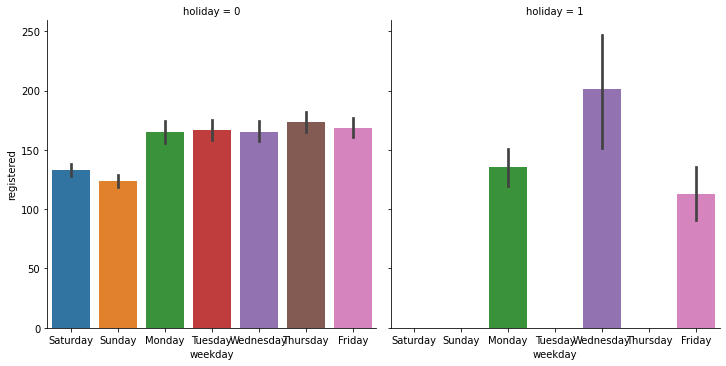

In [40]:
sns.catplot(x='weekday', y='registered', data=X_train, col='holiday', col_wrap=2, kind='bar')

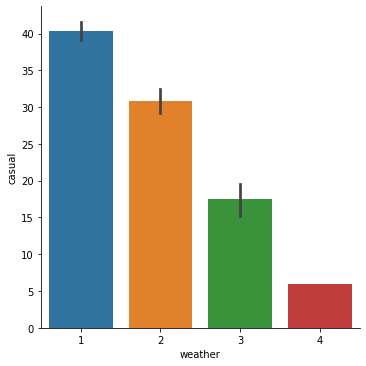

In [41]:
sns.catplot(x='weather', y='casual', data=X_train, kind='bar')

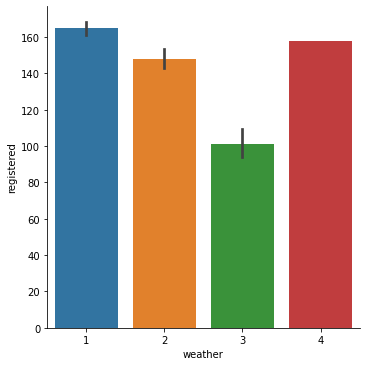

In [42]:
sns.catplot(x='weather', y='registered', data=X_train, kind='bar')

## Benchmark Model

## Feature Engineering

## Train Model

## Optimize Hyperparameters / Cross-Validation

## Calculate test score = Submission to Kaggle